### Data Loading

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_fa = pd.read_excel("sdsu_dti.xlsx", sheet_name="FA")
data_ad= pd.read_excel("sdsu_dti.xlsx", sheet_name="AD")
data_md = pd.read_excel("sdsu_dti.xlsx", sheet_name="MD")
data_rd = pd.read_excel("sdsu_dti.xlsx", sheet_name="RD")

(data_fa.shape, data_ad.shape, data_md.shape, data_rd.shape)

((33, 51), (33, 51), (33, 51), (33, 51))

### Visualization 

**Issue** How to visualise 200 Dimensional data?
- Reduce Dimensions: Use techniques like PCA or t-SNE to reduce dimensions.
- Plot Pairs: Create scatter plots for feature pairs to spot patterns.
- Heatmap: Display correlation matrix as a heatmap.
- Parallel Coordinates: Plot multiple features on parallel axes.
- Box Plots: Show feature distributions using box plots.
- Histograms: Display frequency distribution of individual features.
- Violin Plots: Combine box plots and kernel density plots.
- Feature Importance: Use bar plots to show feature importance.
- Interactive Tools: Utilize tools like Plotly for dynamic visualizations.


In [18]:
import plotly.express as px

In [22]:
px.scatter_matrix(data_ad)  # NOt memory efficient, 

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'axis': {'matches': True},
                              'label': 'subid',
                              'values': array([28853, 28855, 28856, 28857, 28859, 28860, 28861, 28864, 28865, 28866,
                                               28869, 28871, 28872, 28873, 28874, 28875, 28876, 28879, 28884, 28885,
                                               28887, 28890, 28896, 28897, 28898, 28899, 28901, 28903, 28905, 28906,
                                               28907, 28908, 28909], dtype=int64)},
                             {'axis': {'matches': True},
                              'label': '1',
                              'values': array([0.464791, 0.442318, 0.405412, 0.428357, 0.428598, 0.396836, 0.450205,
                                               0.478957, 0.425159, 0.446273, 0.388158, 0.43592 , 0.409748, 0.44889 ,
                                               0.50998 , 0.420808, 0.431151, 0.427212, 0.458456, 0.503173, 0.472574,
                                               0.443463, 0.422153, 0.458729, 0.477615, 0.471203, 0.404768, 0.439615,
                                               0.448005, 0.477   , 0.341692, 0.462851, 0.431192])},
                             {'axis': {'matches': True},
                              'label': '2',
                              'values': array([0.001233, 0.001871, 0.001371, 0.001382, 0.001342, 0.001289, 0.001502,
                                               0.001249, 0.00128 , 0.000926, 0.001245, 0.001272, 0.001212, 0.001307,
                                               0.001266, 0.001277, 0.001207, 0.001442, 0.001362, 0.001648, 0.00167 ,
                                               0.001717, 0.001419, 0.00133 , 0.001406, 0.001352, 0.001731, 0.00143 ,
                                               0.001264, 0.001274, 0.001708, 0.0013  , 0.00177 ])},
                             {'axis': {'matches': True},
                              'label': '3',
                              'values': array([0.000859, 0.0014  , 0.000994, 0.000983, 0.00094 , 0.000956, 0.001076,
                                               0.000804, 0.0009  , 0.000926, 0.00091 , 0.00089 , 0.000841, 0.000852,
                                               0.000823, 0.000848, 0.000811, 0.000973, 0.000927, 0.00125 , 0.001207,
                                               0.00126 , 0.001014, 0.000884, 0.000944, 0.000844, 0.001237, 0.001005,
                                               0.000857, 0.000817, 0.00132 , 0.000897, 0.001345])},
                             {'axis': {'matches': True},
                              'label': '4',
                              'values': array([0.480706, 0.491962, 0.323157, 0.534818, 0.462547, 0.283727, 0.529077,
                                               0.571475, 0.422334, 0.546859, 0.190618, 0.61019 , 0.350534, 0.563133,
                                               0.588176, 0.44594 , 0.488502, 0.491705, 0.528587, 0.377894, 0.375725,
                                               0.345003, 0.493535, 0.527601, 0.496829, 0.640134, 0.541609, 0.466349,
                                               0.437586, 0.60299 , 0.191676, 0.462568, 0.484581])},
                             {'axis': {'matches': True},
                              'label': '5',
                              'values': array([0.000672, 0.001165, 0.000805, 0.000783, 0.000739, 0.00079 , 0.000863,
                                               0.000581, 0.00071 , 0.000698, 0.000743, 0.000698, 0.000655, 0.000625,
                                               0.000601, 0.000633, 0.000613, 0.000738, 0.00071 , 0.001051, 0.000975,
                                               0.001032, 0.000812, 0.000661, 0.000713, 0.00059 , 0.00099 , 0.000793,
                                               0.000654, 0.000589, 0.001126, 0.000696, 0.001132])},
                             {'axis': {'matches': True},
                              'label': '6',
     

In [56]:
# Defining my features 



arr2 = pd.concat([data_ad , data_fa , data_md , data_rd])
X = arr2.values


### K-Means clustering


In [66]:
from sklearn.cluster import KMeans 



kmeans = KMeans (n_clusters = 5 , n_init = 3)
kmeans.fit(X)


KMeans(n_clusters=5, n_init=3)

In [67]:
#Since the Dataset is somewhat large = 33*50*4  , hence , we also tried taking results from Mini Batch K Means Clustering Algo.

from sklearn.cluster import MiniBatchKMeans 

mini_batch = MiniBatchKMeans (n_clusters = 5 , n_init = 3)

mini_batch.fit (X)

MiniBatchKMeans(n_clusters=5, n_init=3)

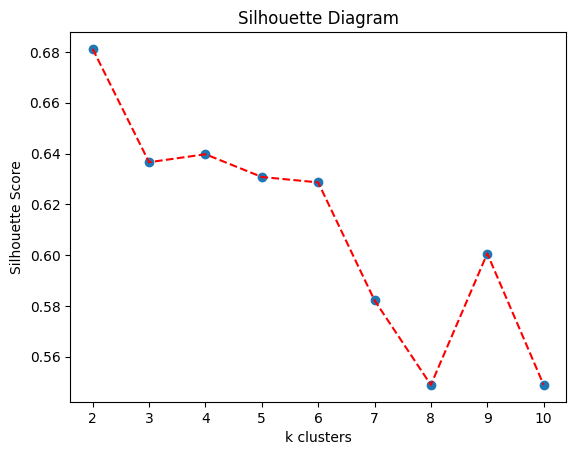

In [68]:
# Selecting the optimum number of clusters 
from sklearn.metrics import silhouette_score 

lis = []
lis_num = []

for i in range(2,11) :
    kmeans1 = KMeans(n_clusters = i , n_init = 3)
    kmeans1.fit(X)
    lis.append(silhouette_score(X, kmeans1.labels_))
    lis_num.append(i)
    
plt.plot(lis_num ,lis , "r--")
plt.scatter(lis_num, lis)
plt.xlabel("k clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Diagram")
plt.show()

# Optimum no .of clusters , where silhouete score s maximum  , is 2 , 4 OR 5 .
    